In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from collections import Counter
import numpy as np
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score
from sklearn import tree
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
import seaborn as sn
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.inspection import permutation_importance


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
import os
os.getcwd()

'/content'

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/My\ Drive/Cast_Project

/content/drive/My Drive/Cast_Project


In [ ]:
data_feature = data[['Level',  
                                             'wordtypes', 'swordtypes','lextypes', 'slextypes', 'wordtokens', 'swordtokens', 'lextokens','slextokens', 'ld', 'ls1', 'ls2', 
                                             'vs1', 'vs2', 'cvs1', 'ndw', 'ndwz', 'ndwerz', 'ndwesz', 'ttr', 'msttr', 'cttr', 
                                             'rttr', 'logttr', 'uber', 'lv', 'vv1', 'svv1', 'cvv1', 'vv2', 'nv', 'adjv' , 'advv', 'modv', 
                                              'Level0', 'Level1', 'Level2','Level3', 'Level4', 'Level5', 'Level6', 'Level7', 'MeanLevel']]

                                              
data_feature["Level"] = data_feature["Level"].astype(str)
le = preprocessing.LabelEncoder()
le.fit(data_feature['Level'])
data_feature["Level_en"] = pd.Series(le.transform(data_feature['Level']))   # label encoded                                            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
y =  data_feature.Level_en
X =  data_feature.drop(['Level_en', 'Level'],axis=1)
scaler=StandardScaler()
scaled_X = scaler.fit_transform(X)

## Recursive feature elimination

In [ ]:
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
# print("Num Features: %d" % fit.n_features_)
# print("Selected Features: %s" % fit.support_)
# print("Feature Ranking: %s" % fit.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## Univariate Selection

In [ ]:
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[220.251 132.33  196.705 132.587 164.106 161.922 203.016 180.339   5.452
   4.107  25.313  10.824  28.779  76.53  220.251 183.222 222.44  193.873
  85.045 276.763 300.403 300.424  21.198 167.004  52.116   2.776 139.284
 238.782   5.112  44.185   3.893  16.943   8.276  64.837  17.203  69.56
  77.564  50.264  71.736  25.556  98.917 101.672]
[[0.44 2.92 4.12 0.94]
 [0.34 1.38 1.94 0.  ]
 [0.48 2.81 3.97 1.41]
 [0.66 3.37 4.76 2.35]
 [0.34 1.38 1.94 0.  ]]


In [ ]:
fit.scores_.shape


(42,)

In [ ]:
np.argmax(fit.scores_, axis=0)

21

## Principal Component Analysis

In [ ]:
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.868e-01 7.602e-03 2.313e-03 1.946e-03 6.114e-04 3.385e-04 1.412e-04
 1.094e-04 7.565e-05 4.338e-05]
[[ 2.093e-01  8.562e-02  1.748e-01  8.162e-02  8.114e-01  1.817e-01
   3.888e-01  1.518e-01 -7.247e-06  1.020e-05  4.350e-05  2.364e-05
   2.904e-03  5.528e-04  2.093e-01  4.255e-03  4.129e-03  3.968e-03
  -5.220e-05  7.097e-05  2.063e-03  2.917e-03  7.049e-06  2.999e-03
  -3.953e-05 -9.668e-06  2.480e-02  1.514e-03 -9.360e-06 -4.351e-05
   3.377e-06  2.532e-06  5.955e-06  9.936e-03  5.104e-04  3.061e-03
   2.934e-03  1.361e-03  2.048e-03  3.783e-04  9.468e-03  3.537e-02]
 [-4.131e-01 -2.049e-01 -3.465e-01 -2.067e-01  5.210e-01 -1.556e-01
  -2.050e-01 -3.136e-01 -1.870e-04 -2.529e-04 -1.773e-04 -1.668e-04
  -8.892e-03 -1.519e-03 -4.131e-01 -1.602e-02 -1.832e-02 -1.835e-02
  -1.460e-04 -3.321e-04 -9.075e-03 -1.283e-02 -1.404e-04 -1.857e-02
  -1.598e-04 -4.472e-04 -8.460e-02 -5.025e-03 -1.184e-05 -6.207e-05
  -4.936e-05 -1.802e-06 -5.060e-05 -1.803e-02 -1.308e-03 -2.

## Feature Importance

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 4 (0.038940)
2. feature 14 (0.034139)
3. feature 6 (0.033330)
4. feature 0 (0.033327)
5. feature 2 (0.030537)
6. feature 19 (0.029221)
7. feature 8 (0.027615)
8. feature 18 (0.027404)
9. feature 15 (0.026187)
10. feature 5 (0.026148)
11. feature 17 (0.025959)
12. feature 21 (0.025911)
13. feature 16 (0.025832)
14. feature 1 (0.024941)
15. feature 7 (0.024558)
16. feature 3 (0.024550)
17. feature 20 (0.024522)
18. feature 27 (0.023774)
19. feature 24 (0.023661)
20. feature 29 (0.023659)
21. feature 41 (0.023548)
22. feature 23 (0.023337)
23. feature 33 (0.023106)
24. feature 26 (0.022748)
25. feature 25 (0.021866)
26. feature 40 (0.021822)
27. feature 22 (0.021790)
28. feature 10 (0.021509)
29. feature 28 (0.021158)
30. feature 32 (0.020871)
31. feature 9 (0.020615)
32. feature 30 (0.019928)
33. feature 31 (0.019913)
34. feature 35 (0.019758)
35. feature 13 (0.019701)
36. feature 36 (0.019500)
3

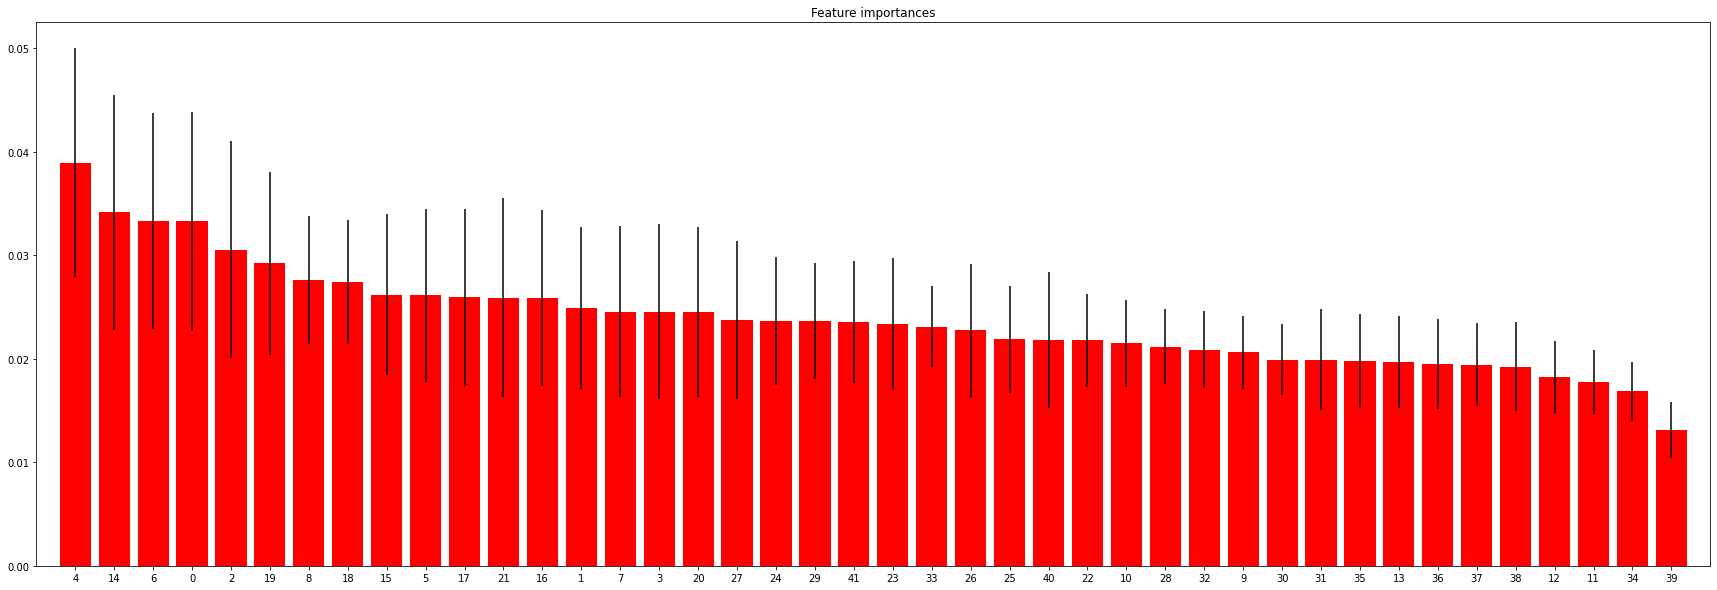

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize = (30,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
indices

array([ 4, 14,  6,  0,  2, 19,  8, 18, 15,  5, 17, 21, 16,  1,  7,  3, 20,
       27, 24, 29, 41, 23, 33, 26, 25, 40, 22, 10, 28, 32,  9, 30, 31, 35,
       13, 36, 37, 38, 12, 11, 34, 39])

In [ ]:
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.035 0.022 0.029 0.02  0.038 0.026 0.033 0.027 0.03  0.02  0.021 0.017
 0.018 0.02  0.039 0.028 0.026 0.021 0.027 0.029 0.028 0.021 0.021 0.023
 0.024 0.023 0.025 0.022 0.022 0.025 0.019 0.019 0.023 0.021 0.017 0.019
 0.018 0.018 0.02  0.013 0.02  0.029]


In [ ]:
X

,wordtypes,swordtypes,lextypes,slextypes,wordtokens,swordtokens,lextokens,slextokens,ld,ls1,ls2,vs1,vs2,cvs1,ndw,ndwz,ndwerz,ndwesz,ttr,msttr,cttr,rttr,logttr,uber,lv,vv1,svv1,cvv1,vv2,nv,adjv,advv,modv,Level0,Level1,Level2,Level3,Level4,Level5,Level6,Level7,MeanLevel
0,33,8,20,8,64,17,39,17,0.61,0.44,0.24,0.07,0.07,0.19,33,22,27.6,27.1,0.52,0.44,2.92,4.12,0.84,11.34,0.51,0.36,1.79,0.94,0.13,0.60,0.00,0.00,0.00,8,0,0,1,0,0,0,2,17.0
1,11,6,9,6,32,6,16,6,0.50,0.38,0.55,0.00,0.00,0.00,11,11,11.0,11.0,0.34,0.34,1.38,1.94,0.69,0.00,0.56,0.00,0.00,0.00,0.00,0.12,0.50,0.00,0.50,8,0,0,0,0,0,0,0,0.0
2,30,4,19,4,57,13,28,13,0.49,0.46,0.13,0.00,0.00,0.00,30,24,26.4,26.4,0.53,0.48,2.81,3.97,0.84,11.06,0.68,1.00,4.00,1.41,0.14,0.47,0.21,0.04,0.25,12,0,0,0,0,0,0,0,0.0
3,34,7,22,7,51,14,29,14,0.57,0.48,0.21,0.18,0.36,0.43,34,33,33.3,33.4,0.67,0.66,3.37,4.76,0.90,16.56,0.76,1.00,11.00,2.35,0.38,0.56,0.07,0.00,0.07,7,0,1,1,0,1,0,0,5.0
4,11,7,8,7,32,7,8,7,0.25,0.88,0.64,0.00,0.00,0.00,11,11,11.0,11.0,0.34,0.34,1.38,1.94,0.69,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,8,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,32,3,21,3,43,4,22,4,0.51,0.18,0.09,0.33,0.67,0.58,32,32,32.0,32.0,0.74,0.74,3.45,4.88,0.92,20.79,0.95,1.00,6.00,1.73,0.27,1.00,0.09,0.00,0.09,10,0,1,1,0,0,0,0,3.5
2461,34,6,20,6,60,7,34,7,0.57,0.21,0.18,0.00,0.00,0.00,34,30,29.6,31.0,0.57,0.60,3.10,4.39,0.86,12.82,0.59,0.75,4.50,1.50,0.18,0.85,0.09,0.00,0.09,10,0,1,1,0,0,1,0,4.0
2462,10,7,9,7,17,7,9,7,0.53,0.78,0.70,0.00,0.00,0.00,10,10,10.0,10.0,0.59,0.59,1.71,2.43,0.81,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,8,0,0,0,0,0,0,0,0.0
2463,31,8,21,8,51,17,32,17,0.63,0.53,0.26,0.00,0.00,0.00,31,31,30.4,31.0,0.61,0.62,3.07,4.34,0.87,13.49,0.66,1.00,5.00,1.58,0.16,0.82,0.06,0.00,0.06,9,0,0,2,0,0,0,0,3.0


## Permutation feature importance

In [ ]:
# data_features_X =  data_feature.drop('Level',axis=1)
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=0)
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

0.4278904703785942

In [ ]:
r = permutation_importance(model, X_val, y_val, n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

NameError: ignored

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
type(diabetes)

## Regression Feature Selection:

In [ ]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 10)


In [ ]:
X_selected

array([[ 6.896e-02,  5.468e-02, -4.274e-01, -1.626e+00, -1.069e+00,
         7.482e-01, -5.634e-01, -1.055e+00,  1.039e+00, -1.071e-01],
       [ 3.691e-01, -9.510e-01, -1.625e-01, -4.085e-01, -2.031e+00,
         5.470e-01,  3.634e-01,  2.187e+00, -2.862e+00, -6.409e-01],
       [ 1.718e+00,  4.214e-01,  1.247e+00, -8.374e-01, -1.670e-01,
         1.014e-01,  1.061e-01, -2.093e-01,  2.999e-01,  1.697e+00],
       [-1.949e+00,  9.839e-01,  1.084e+00,  7.866e-01, -6.213e-01,
        -8.416e-01,  1.475e+00,  8.287e-01, -5.380e-01,  3.068e-01],
       [ 1.087e+00, -1.047e+00,  7.034e-01, -1.329e+00, -1.278e+00,
        -4.565e-01, -4.402e-01,  1.125e+00,  1.142e-01, -2.000e+00],
       [-3.186e+00,  1.201e+00, -2.297e+00, -8.617e-01,  1.438e+00,
         6.523e-01,  1.338e+00, -1.938e+00,  2.766e+00,  1.499e+00],
       [-4.570e-01, -2.401e-01,  1.486e+00,  5.175e-01,  2.189e+00,
         5.334e-01, -1.784e-01, -1.965e-02,  3.346e-01, -7.958e-02],
       [-3.984e-01,  1.173e+00,  2.433e-0

## Data exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd85ad46c50>,
      dtype=object)

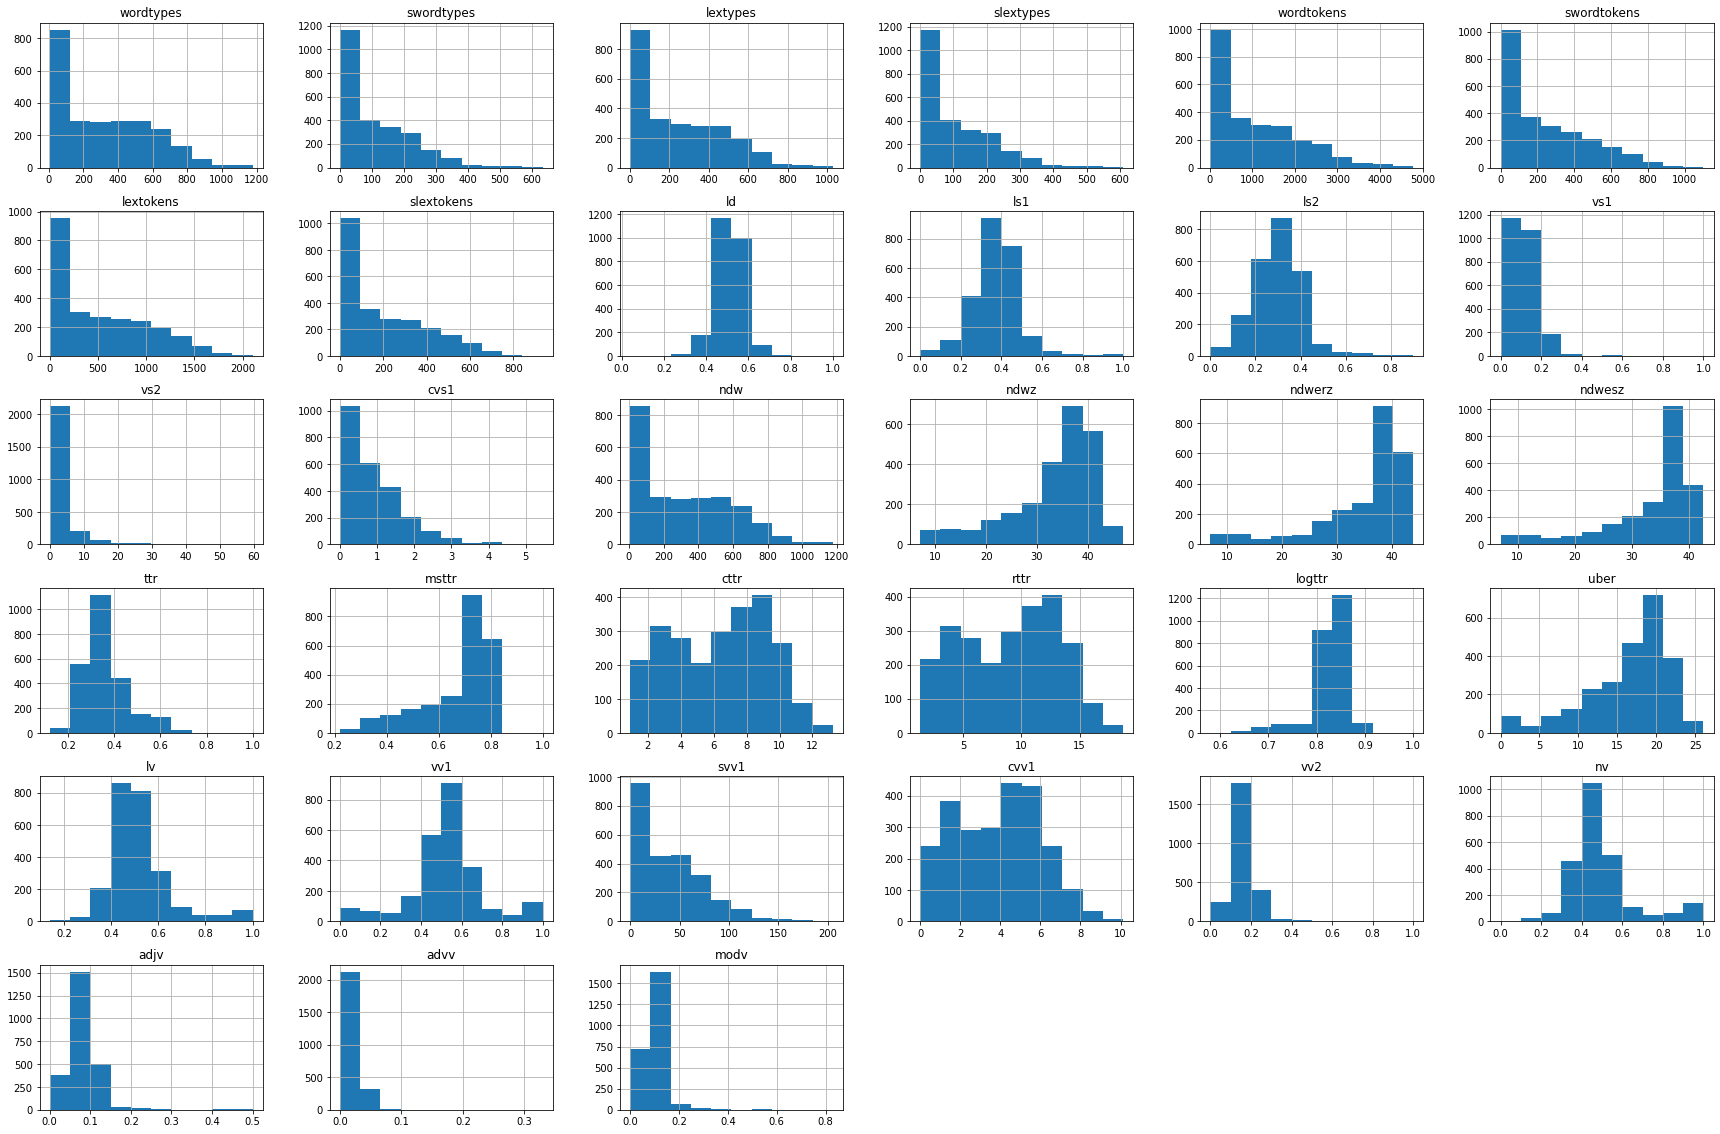

In [ ]:
data_lexical = data[[ 'wordtypes', 'swordtypes','lextypes', 'slextypes', 'wordtokens', 'swordtokens', 'lextokens','slextokens', 'ld', 'ls1', 'ls2', 
                                             'vs1', 'vs2', 'cvs1', 'ndw', 'ndwz', 'ndwerz', 'ndwesz', 'ttr', 'msttr', 'cttr', 
                                             'rttr', 'logttr', 'uber', 'lv', 'vv1', 'svv1', 'cvv1', 'vv2', 'nv', 'adjv' , 'advv', 'modv']]

data_lexical.hist( figsize=(30,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd861e12dd0>,
      dtype=object)

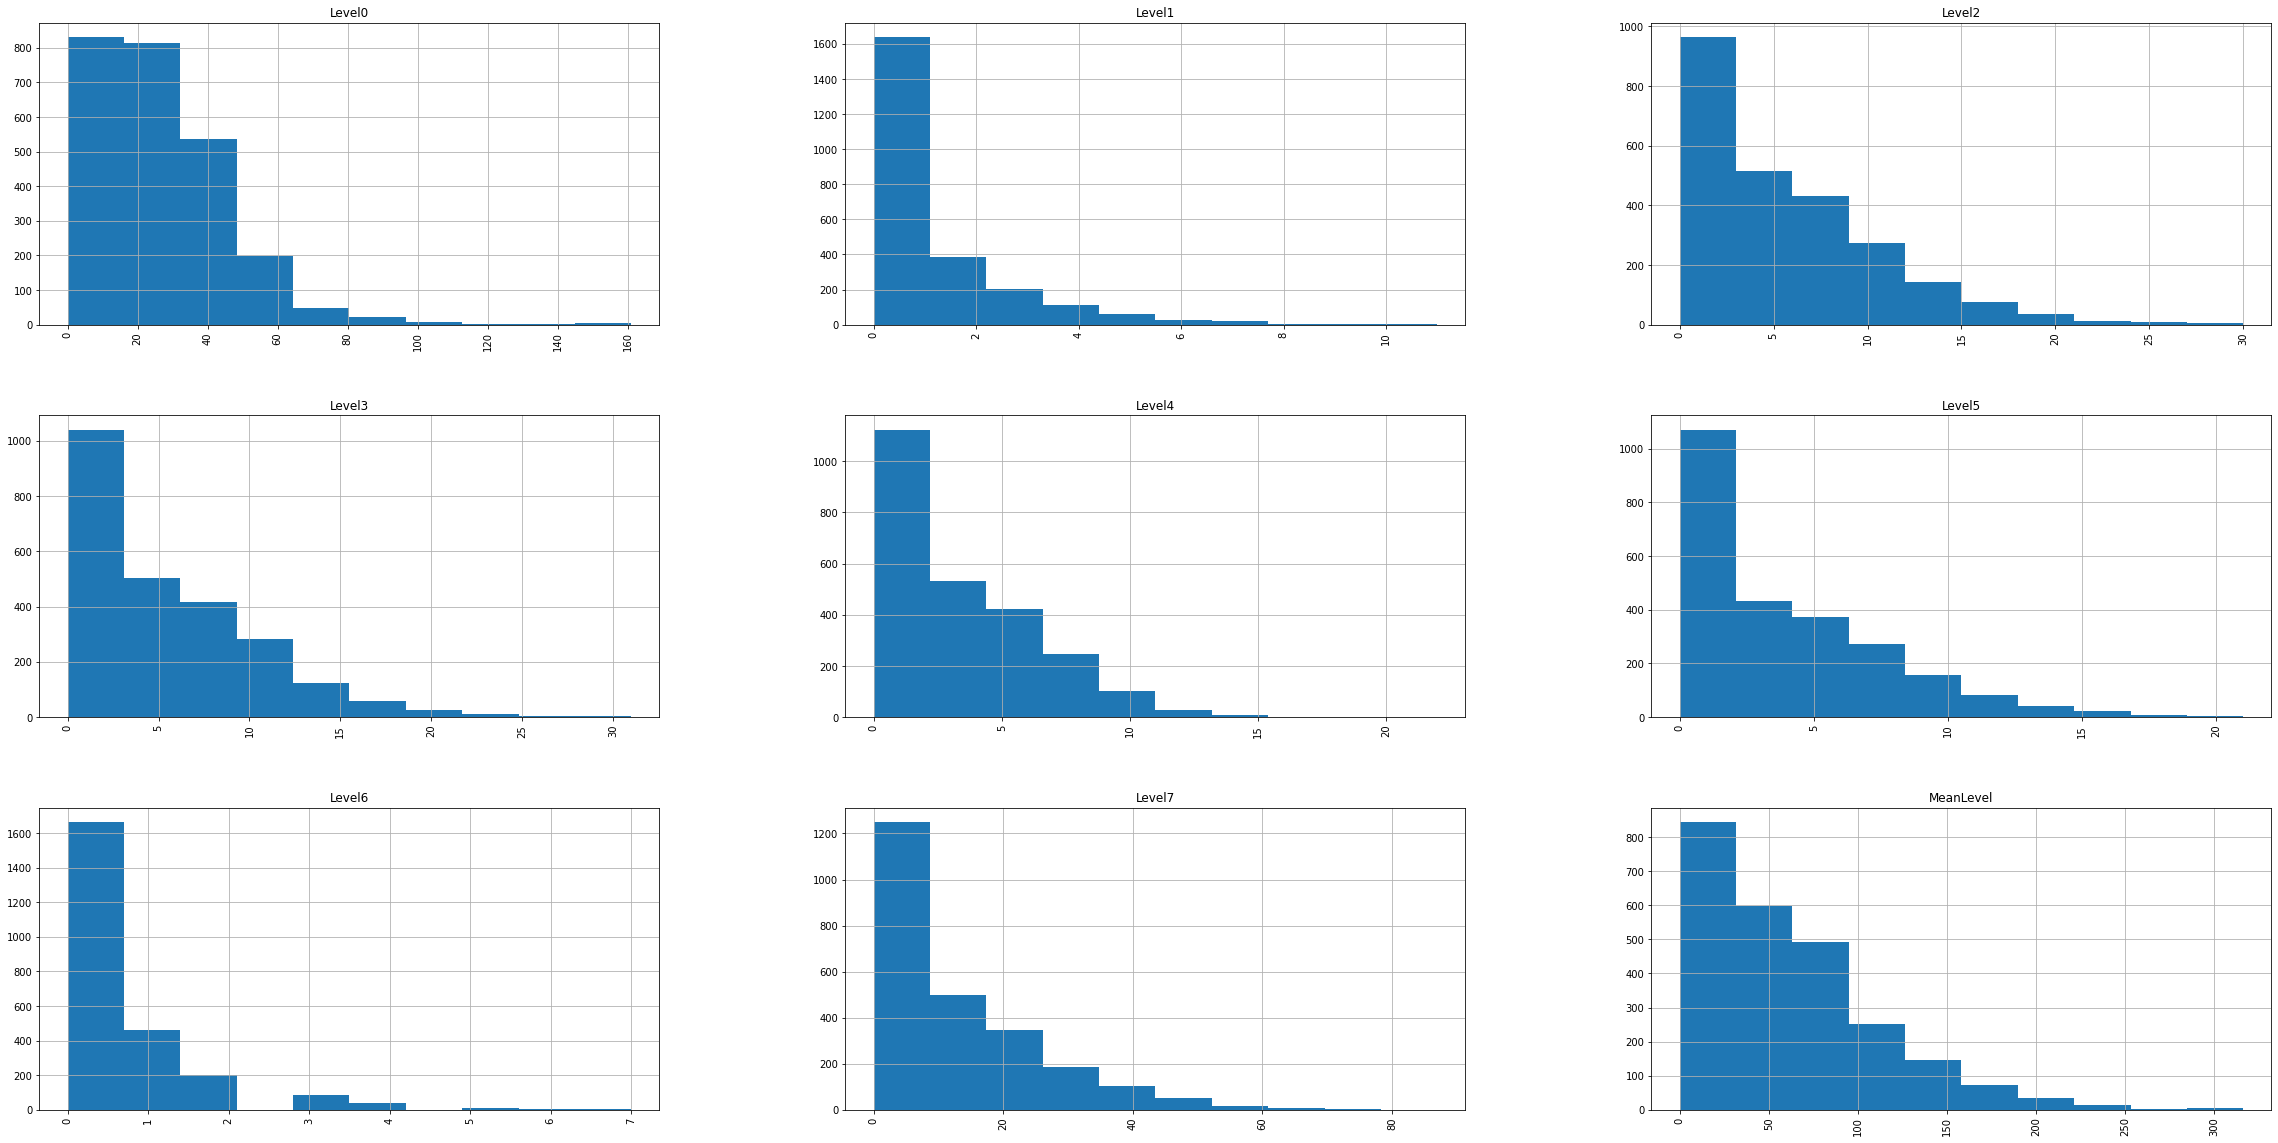

In [ ]:
data_d_level = data[[ 'Level0', 'Level1', 'Level2','Level3', 'Level4', 'Level5', 'Level6', 'Level7', 'MeanLevel']]

data_d_level.hist(xrot=90, figsize=(40,20))

In [ ]:
# y =  data_feature.Level_en
data_cor =  data_feature.drop(['Level_en', 'Level'],axis=1)
data_cor

,wordtypes,swordtypes,lextypes,slextypes,wordtokens,swordtokens,lextokens,slextokens,ld,ls1,ls2,vs1,vs2,cvs1,ndw,ndwz,ndwerz,ndwesz,ttr,msttr,cttr,rttr,logttr,uber,lv,vv1,svv1,cvv1,vv2,nv,adjv,advv,modv,Level0,Level1,Level2,Level3,Level4,Level5,Level6,Level7,MeanLevel
0,33,8,20,8,64,17,39,17,0.61,0.44,0.24,0.07,0.07,0.19,33,22,27.6,27.1,0.52,0.44,2.92,4.12,0.84,11.34,0.51,0.36,1.79,0.94,0.13,0.60,0.00,0.00,0.00,8,0,0,1,0,0,0,2,17.0
1,11,6,9,6,32,6,16,6,0.50,0.38,0.55,0.00,0.00,0.00,11,11,11.0,11.0,0.34,0.34,1.38,1.94,0.69,0.00,0.56,0.00,0.00,0.00,0.00,0.12,0.50,0.00,0.50,8,0,0,0,0,0,0,0,0.0
2,30,4,19,4,57,13,28,13,0.49,0.46,0.13,0.00,0.00,0.00,30,24,26.4,26.4,0.53,0.48,2.81,3.97,0.84,11.06,0.68,1.00,4.00,1.41,0.14,0.47,0.21,0.04,0.25,12,0,0,0,0,0,0,0,0.0
3,34,7,22,7,51,14,29,14,0.57,0.48,0.21,0.18,0.36,0.43,34,33,33.3,33.4,0.67,0.66,3.37,4.76,0.90,16.56,0.76,1.00,11.00,2.35,0.38,0.56,0.07,0.00,0.07,7,0,1,1,0,1,0,0,5.0
4,11,7,8,7,32,7,8,7,0.25,0.88,0.64,0.00,0.00,0.00,11,11,11.0,11.0,0.34,0.34,1.38,1.94,0.69,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,8,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,32,3,21,3,43,4,22,4,0.51,0.18,0.09,0.33,0.67,0.58,32,32,32.0,32.0,0.74,0.74,3.45,4.88,0.92,20.79,0.95,1.00,6.00,1.73,0.27,1.00,0.09,0.00,0.09,10,0,1,1,0,0,0,0,3.5
2461,34,6,20,6,60,7,34,7,0.57,0.21,0.18,0.00,0.00,0.00,34,30,29.6,31.0,0.57,0.60,3.10,4.39,0.86,12.82,0.59,0.75,4.50,1.50,0.18,0.85,0.09,0.00,0.09,10,0,1,1,0,0,1,0,4.0
2462,10,7,9,7,17,7,9,7,0.53,0.78,0.70,0.00,0.00,0.00,10,10,10.0,10.0,0.59,0.59,1.71,2.43,0.81,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,8,0,0,0,0,0,0,0,0.0
2463,31,8,21,8,51,17,32,17,0.63,0.53,0.26,0.00,0.00,0.00,31,31,30.4,31.0,0.61,0.62,3.07,4.34,0.87,13.49,0.66,1.00,5.00,1.58,0.16,0.82,0.06,0.00,0.06,9,0,0,2,0,0,0,0,3.0


In [ ]:
data_cor_val = data_cor[data_cor.columns[0:data_cor.shape[1]]].corr()
data_cor_val_2 = pd.DataFrame(data_cor_val)
data_cor_val_2.T

,wordtypes,swordtypes,lextypes,slextypes,wordtokens,swordtokens,lextokens,slextokens,ld,ls1,ls2,vs1,vs2,cvs1,ndw,ndwz,ndwerz,ndwesz,ttr,msttr,cttr,rttr,logttr,uber,lv,vv1,svv1,cvv1,vv2,nv,adjv,advv,modv,Level0,Level1,Level2,Level3,Level4,Level5,Level6,Level7,MeanLevel
wordtypes,1.000000,0.973368,0.997977,0.972588,0.971449,0.962913,0.981733,0.969409,-0.098701,0.122441,0.498668,0.383596,0.684692,0.844707,1.000000,0.669956,0.679385,0.680404,-0.629693,0.717380,0.945285,0.945285,0.295038,0.763297,-0.346558,-0.005300,0.931743,0.927439,-0.140411,-0.309676,0.115261,0.197533,0.169939,0.680236,0.402505,0.752616,0.702709,0.580422,0.674073,0.487278,0.846868,0.810041
swordtypes,0.973368,1.000000,0.981993,0.999656,0.947048,0.957154,0.950038,0.963160,-0.101580,0.171789,0.563910,0.417508,0.781618,0.879835,0.973368,0.576090,0.580874,0.583370,-0.563545,0.622321,0.886481,0.886484,0.253948,0.690078,-0.276145,-0.013202,0.922660,0.874922,-0.135140,-0.230658,0.114007,0.162694,0.157075,0.629300,0.354196,0.721036,0.637769,0.511251,0.607690,0.455674,0.803535,0.758063
lextypes,0.997977,0.981993,1.000000,0.981585,0.971584,0.963909,0.980781,0.970991,-0.094421,0.127592,0.513970,0.389076,0.707878,0.853938,0.997977,0.643826,0.651431,0.653001,-0.615799,0.691722,0.931776,0.931777,0.280279,0.742736,-0.328332,-0.010404,0.935422,0.918051,-0.140265,-0.288380,0.114643,0.185741,0.165401,0.667927,0.396190,0.751803,0.693834,0.566455,0.662379,0.482449,0.847714,0.804955
slextypes,0.972588,0.999656,0.981585,1.000000,0.944214,0.955503,0.949204,0.964082,-0.094588,0.174431,0.565132,0.417420,0.779279,0.877625,0.972588,0.573573,0.579190,0.581598,-0.559107,0.620755,0.886503,0.886506,0.255516,0.690063,-0.273702,-0.011527,0.921713,0.873263,-0.137135,-0.228449,0.114317,0.158084,0.155845,0.628837,0.354163,0.720819,0.634917,0.511177,0.608286,0.458946,0.800845,0.753554
wordtokens,0.971449,0.947048,0.971584,0.944214,1.000000,0.971622,0.989216,0.956626,-0.157589,0.093490,0.483051,0.340435,0.662484,0.813032,0.971449,0.607737,0.608052,0.606102,-0.672467,0.640756,0.864065,0.864063,0.192642,0.664806,-0.384066,-0.075450,0.877934,0.867137,-0.157797,-0.319968,0.082395,0.179103,0.134573,0.664669,0.378789,0.747997,0.721120,0.554021,0.655705,0.463426,0.889141,0.858559
swordtokens,0.962913,0.957154,0.963909,0.955503,0.971622,1.000000,0.971267,0.984464,-0.125800,0.187228,0.524070,0.380112,0.691531,0.840770,0.962913,0.607438,0.601055,0.600820,-0.645319,0.638011,0.868159,0.868149,0.208580,0.671470,-0.366700,-0.051054,0.890812,0.872181,-0.151300,-0.318342,0.077337,0.173342,0.127609,0.670473,0.352463,0.727092,0.689804,0.538022,0.632061,0.455036,0.822414,0.814849
lextokens,0.981733,0.950038,0.980781,0.949204,0.989216,0.971267,1.000000,0.975258,-0.084584,0.107064,0.487015,0.335245,0.632625,0.797426,0.981733,0.623455,0.634234,0.630747,-0.663572,0.667913,0.892290,0.892288,0.221130,0.695570,-0.398967,-0.063761,0.882023,0.878149,-0.180252,-0.338164,0.082802,0.158391,0.128163,0.685339,0.393990,0.756839,0.722718,0.584399,0.685168,0.500785,0.874423,0.834649
slextokens,0.969409,0.963160,0.970991,0.964082,0.956626,0.984464,0.975258,1.000000,-0.060838,0.204960,0.531381,0.377382,0.677195,0.826662,0.969409,0.605338,0.613169,0.611117,-0.621045,0.649882,0.888326,0.888324,0.235153,0.693002,-0.362208,-0.033188,0.895037,0.875518,-0.172380,-0.317257,0.086367,0.147087,0.127476,0.678301,0.373843,0.743505,0.678987,0.557336,0.664942,0.499187,0.820420,0.781954
ld,-0.098701,-0.101580,-0.094421,-0.094588,-0.157589,-0.125800,-0.084584,-0.060838,1.000000,0.028415,0.021228,-0.105859,-0.175948,-0.177772,-0.098701,-0.049146,0.003861,-0.008992,0.237478,0.020029,-0.034701,-0.034673,0.159316,0.028223,-0.211617,-0.022415,-0.127689,-0.113148,-0.170809,-0.138082,0.033575,-0.168967,-0.026145,-0.025299,-0.011295,-0.076707,-0.130112,0.028887,0.005231,0.053342,-0.166503,-0.195513
ls1,0.122441,0.171789,0.127592,0.174431,0.093490,0.187228,0.107064,0.204960,0.028415,1.000000,0.652780,0.249599,0.162076,0.198636,0.122441,-0.019663,-0.051461,-0.04

In [ ]:
n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 100
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        # c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
        marker='s' # Use square as scatterplot marker
       
    )
    
    # Show column labels on the axes
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

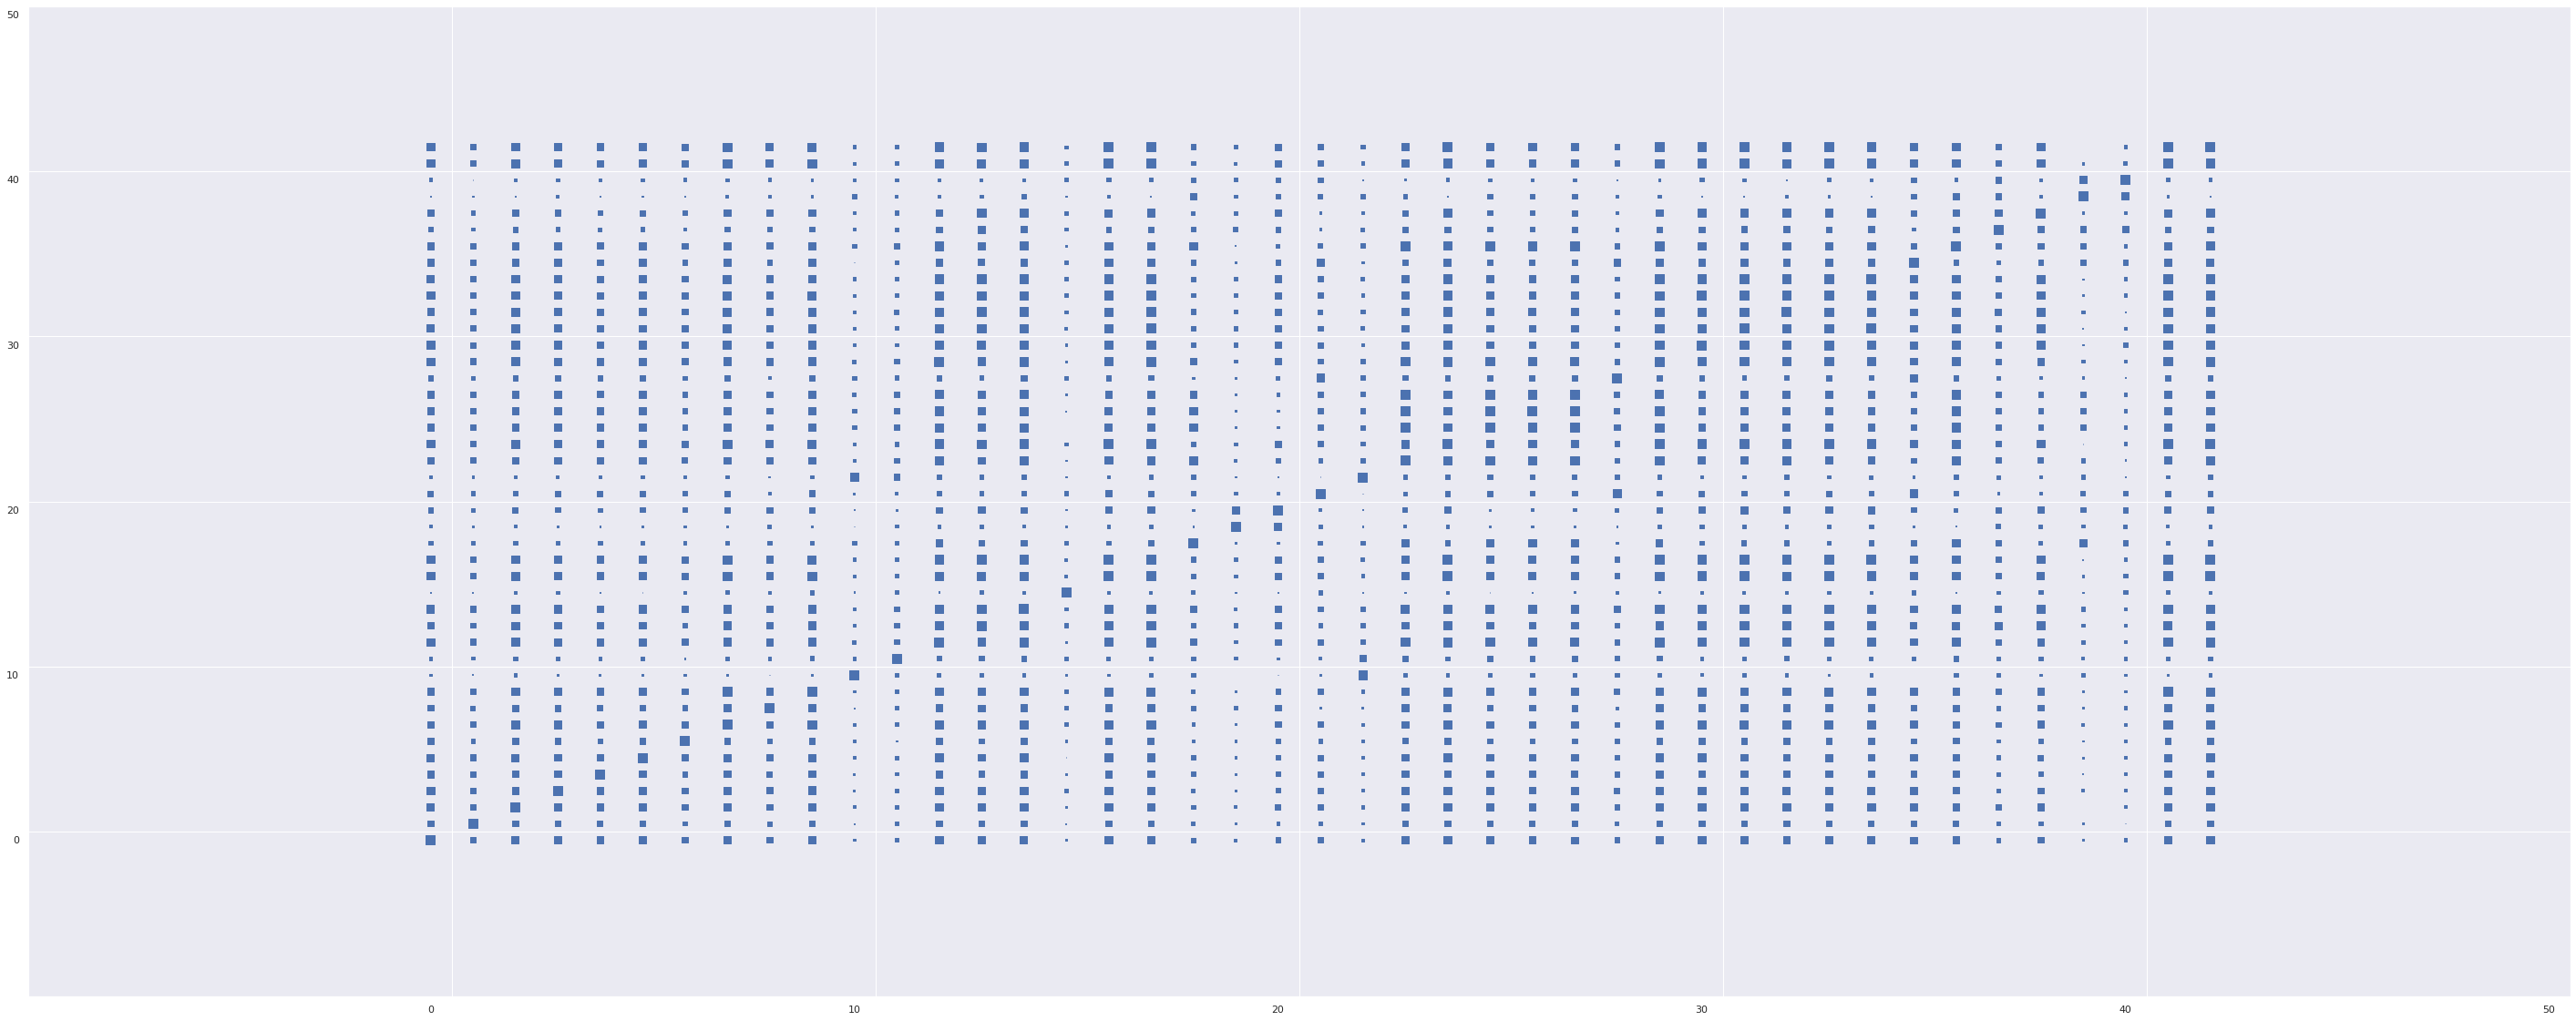

In [ ]:
# corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y

data_cor_val = data_cor[data_cor.columns[0:data_cor.shape[1]]].corr()
data_cor_val_2 = pd.DataFrame(data_cor_val)
data_cor_val_3 = pd.melt(data_cor_val_2.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
data_cor_val_3

data_cor_val_3.columns = ['x', 'y', 'value']
heatmap(
    x=data_cor_val_3['x'],
    y=data_cor_val_3['y'],
    size=data_cor_val_3['value'].abs()
)

sns.set(rc={'figure.figsize':(50,20)})

In [ ]:
data_cor_val_3

,x,y,value
0,wordtypes,wordtypes,1.000000
1,swordtypes,wordtypes,0.973368
2,lextypes,wordtypes,0.997977
3,slextypes,wordtypes,0.972588
4,wordtokens,wordtypes,0.971449
...,...,...,...
1844,Level5,Level_en,0.402157
1845,Level6,Level_en,0.291650
1846,Level7,Level_en,0.559004
1847,MeanLevel,Level_en,0.554767


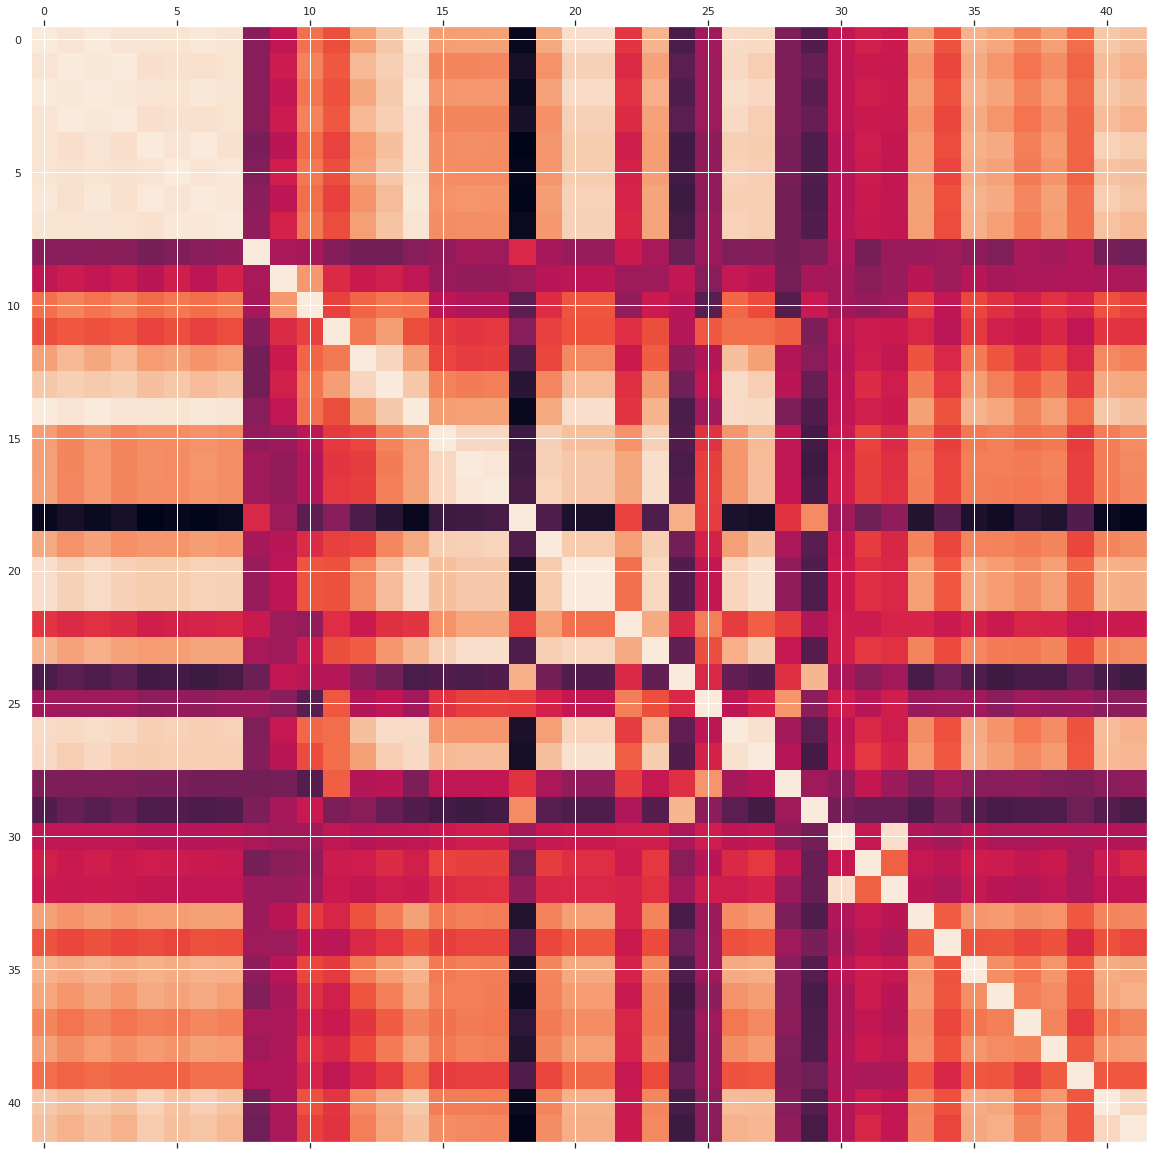

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# fig, ax = plt.subplots(figsize=(50,5))
# ax.matshow(d.corr())
matfig = plt.figure(figsize=(300,20))
plt.matshow(data_cor.corr(), fignum=matfig.number)

axp = ax.imshow(np.random.randint(0, 40, (40, 40)))
cb = plt.colorbar(axp,ax=[ax],location='right')

plt.show()

In [ ]:
import pandas as pd
import numpy as np

corr = data_cor.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,wordtypes,swordtypes,lextypes,slextypes,wordtokens,swordtokens,lextokens,slextokens,ld,ls1,ls2,vs1,vs2,cvs1,ndw,ndwz,ndwerz,ndwesz,ttr,msttr,cttr,rttr,logttr,uber,lv,vv1,svv1,cvv1,vv2,nv,adjv,advv,modv,Level0,Level1,Level2,Level3,Level4,Level5,Level6,Level7,MeanLevel
wordtypes,1.00,0.97,1.00,0.97,0.97,0.96,0.98,0.97,-0.10,0.12,0.50,0.38,0.68,0.84,1.00,0.67,0.68,0.68,-0.63,0.72,0.95,0.95,0.30,0.76,-0.35,-0.01,0.93,0.93,-0.14,-0.31,0.12,0.20,0.17,0.68,0.40,0.75,0.70,0.58,0.67,0.49,0.85,0.81
swordtypes,0.97,1.00,0.98,1.00,0.95,0.96,0.95,0.96,-0.10,0.17,0.56,0.42,0.78,0.88,0.97,0.58,0.58,0.58,-0.56,0.62,0.89,0.89,0.25,0.69,-0.28,-0.01,0.92,0.87,-0.14,-0.23,0.11,0.16,0.16,0.63,0.35,0.72,0.64,0.51,0.61,0.46,0.80,0.76
lextypes,1.00,0.98,1.00,0.98,0.97,0.96,0.98,0.97,-0.09,0.13,0.51,0.39,0.71,0.85,1.00,0.64,0.65,0.65,-0.62,0.69,0.93,0.93,0.28,0.74,-0.33,-0.01,0.94,0.92,-0.14,-0.29,0.11,0.19,0.17,0.67,0.40,0.75,0.69,0.57,0.66,0.48,0.85,0.80
slextypes,0.97,1.00,0.98,1.00,0.94,0.96,0.95,0.96,-0.09,0.17,0.57,0.42,0.78,0.88,0.97,0.57,0.58,0.58,-0.56,0.62,0.89,0.89,0.26,0.69,-0.27,-0.01,0.92,0.87,-0.14,-0.23,0.11,0.16,0.16,0.63,0.35,0.72,0.63,0.51,0.61,0.46,0.80,0.75
wordtokens,0.97,0.95,0.97,0.94,1.00,0.97,0.99,0.96,-0.16,0.09,0.48,0.34,0.66,0.81,0.97,0.61,0.61,0.61,-0.67,0.64,0.86,0.86,0.19,0.66,-0.38,-0.08,0.88,0.87,-0.16,-0.32,0.08,0.18,0.13,0.66,0.38,0.75,0.72,0.55,0.66,0.46,0.89,0.86
swordtokens,0.96,0.96,0.96,0.96,0.97,1.00,0.97,0.98,-0.13,0.19,0.52,0.38,0.69,0.84,0.96,0.61,0.60,0.60,-0.65,0.64,0.87,0.87,0.21,0.67,-0.37,-0.05,0.89,0.87,-0.15,-0.32,0.08,0.17,0.13,0.67,0.35,0.73,0.69,0.54,0.63,0.46,0.82,0.81
lextokens,0.98,0.95,0.98,0.95,0.99,0.97,1.00,0.98,-0.08,0.11,0.49,0.34,0.63,0.80,0.98,0.62,0.63,0.63,-0.66,0.67,0.89,0.89,0.22,0.70,-0.40,-0.06,0.88,0.88,-0.18,-0.34,0.08,0.16,0.13,0.69,0.39,0.76,0.72,0.58,0.69,0.50,0.87,0.83
slextokens,0.97,0.96,0.97,0.96,0.96,0.98,0.98,1.00,-0.06,0.20,0.53,0.38,0.68,0.83,0.97,0.61,0.61,0.61,-0.62,0.65,0.89,0.89,0.24,0.69,-0.36,-0.03,0.90,0.88,-0.17,-0.32,0.09,0.15,0.13,0.68,0.37,0.74,0.68,0.56,0.66,0.50,0.82,0.78
ld,-0.10,-0.10,-0.09,-0.09,-0.16,-0.13,-0.08,-0.06,1.00,0.03,0.02,-0.11,-0.18,-0.18,-0.10,-0.05,0.00,-0.01,0.24,0.02,-0.03,-0.03,0.16,0.03,-0.21,-0.02,-0.13,-0.11,-0.17,-0.14,0.03,-0.17,-0.03,-0.03,-0.01,-0.08,-0.13,0.03,0.01,0.05,-0.17,-0.20
ls1,0.12,0.17,0.13,0.17,0.09,0.19,0.11,0.20,0.03,1.00,0.65,0.25,0.16,0.20,0.12,-0.02,-0.05,-0.05,-0.02,0.09,0.11,0.11,-0.02,-0.01,0.13,-0.10,0.14,0.09,-0.17,0.02,-0.01,-0.10,-0.04,0.09,-0.02,0.09,0.03,0.04,0.05,0.06,0.04,0.03
